In [46]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/PC/OneDrive - gachon.ac.kr/바탕 화면/ai-study/mhealth_full.csv")
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [48]:
# 데이터 확인
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [49]:
# 컬렴명 확인
df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity', 'subject'],
      dtype='object')

### acc_ch_x, acc_ch_y, acc_ch_z: 가슴 부위의 가속도계 X, Y, Z 축 데이터
### acc_la_x, acc_la_y, acc_la_z: 왼팔 부위의 가속도계 X, Y, Z 축 데이터
### gyr_la_x, gyr_la_y, gyr_la_z: 왼팔 부위의 자이로스코프 X, Y, Z 축 데이터
### mag_la_x, mag_la_y, mag_la_z: 왼팔 부위의 자력계 X, Y, Z 축 데이터
### acc_rw_x, acc_rw_y, acc_rw_z: 오른쪽 손목 부위의 가속도계 X, Y, Z 축 데이터
### gyr_rw_x, gyr_rw_y, gyr_rw_z: 오른쪽 손목 부위의 자이로스코프 X, Y, Z 축 데이터
### mag_rw_x, mag_rw_y, mag_rw_z: 오른쪽 손목 부위의 자력계 X, Y, Z 축 데이터
### activity: 수행된 활동의 유형
### subject: 데이터를 수집한 대상 (피험자)

## @여기서 subject를 제외했습니다.subject 값이 문자로 나와서 제외 했습니다

In [50]:
df = df[['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z','gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z','acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z','mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity']]

In [51]:
# 결측치 확인
df.isnull().sum()

acc_ch_x    0
acc_ch_y    0
acc_ch_z    0
acc_la_x    0
acc_la_y    0
acc_la_z    0
gyr_la_x    0
gyr_la_y    0
gyr_la_z    0
mag_la_x    0
mag_la_y    0
mag_la_z    0
acc_rw_x    0
acc_rw_y    0
acc_rw_z    0
gyr_rw_x    0
gyr_rw_y    0
gyr_rw_z    0
mag_rw_x    0
mag_rw_y    0
mag_rw_z    0
activity    0
dtype: int64

In [52]:
# 결측치 확인
df.isnull().sum()

acc_ch_x    0
acc_ch_y    0
acc_ch_z    0
acc_la_x    0
acc_la_y    0
acc_la_z    0
gyr_la_x    0
gyr_la_y    0
gyr_la_z    0
mag_la_x    0
mag_la_y    0
mag_la_z    0
acc_rw_x    0
acc_rw_y    0
acc_rw_z    0
gyr_rw_x    0
gyr_rw_y    0
gyr_rw_z    0
mag_rw_x    0
mag_rw_y    0
mag_rw_z    0
activity    0
dtype: int64

## 다음과 같이 설정
### x=activity를 제외한 나머지
### y=activity

In [53]:
X=df.drop('activity',axis=1)
X.head()

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,mag_la_z,acc_rw_x,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,0.29963,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,0.58298,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,0.43851,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,0.57571,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,0.44586,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500


In [54]:
y=df['activity']
y.value_counts()

activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

In [55]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

## 데이터 준비

#### train_test_split 함수는 데이터를 학습용과 테스트용으로 나누는 데 사용됩니다. 
#### 이 함수는 scikit-learn에서 제공하며, 데이터셋을 무작위로 분할하고, 필요한 경우 분할 비율을 지정할 수 있습니다

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

#### split_sequences 함수는 시퀀스 데이터를 특정 길이의 패턴으로 나누어 모델 학습에 적합한 형태로 변환하는 함수

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [62]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [63]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(1094166, 5, 21) (1094166,)
(121571, 5, 21) (121571,)


In [64]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [65]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [66]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

## 모델 정의

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(units=64, return_sequences=True, input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))

# CNN 레이어 추가
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

# Dense 레이어 추가
model.add(Dense(64, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 5, 64)               │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │             845 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,149 (121.68 KB)

 Trainable params: 31,149 (121.68 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

Epoch 1/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 144s 4ms/step - accuracy: 0.7151 - loss: 1.3070 - val_accuracy: 0.7181 - val_loss: 1.2890
Epoch 2/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 126s 4ms/step - accuracy: 0.7176 - loss: 1.2909 - val_accuracy: 0.7181 - val_loss: 1.2889
Epoch 3/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 127s 4ms/step - accuracy: 0.7179 - loss: 1.2901 - val_accuracy: 0.7181 - val_loss: 1.2889
Epoch 4/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 100s 3ms/step - accuracy: 0.7170 - loss: 1.2928 - val_accuracy: 0.7181 - val_loss: 1.2891
Epoch 5/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 98s 3ms/step - accuracy: 0.7177 - loss: 1.2905 - val_accuracy: 0.7181 - val_loss: 1.2888
Epoch 6/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 100s 3ms/step - accuracy: 0.7180 - loss: 1.2894 - val_accuracy: 0.7181 - val_loss: 1.2887
Epoch 7/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 99s 3ms/step - accuracy: 0.7175 - loss: 1.2909 - val_accuracy: 0.7181 - val_loss: 1.2886
Epoch 8/30
30774/30774 ━━━━━━━━━━━━━━━━━━━━ 99s 3ms/step - accur

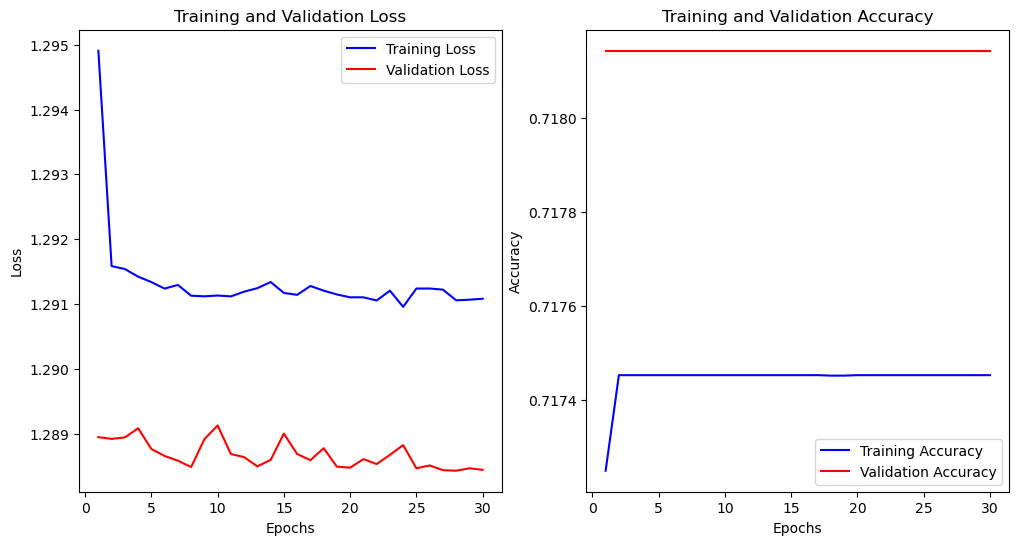

In [68]:
import matplotlib.pyplot as plt

# 모델 학습
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=1, validation_split=0.1)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# 훈련 과정 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 성능 평가

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

# 예측
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test_onehot, axis=1)

# 성능 평가
print(classification_report(y_test_class, y_pred_class))
print('*' * 50)
print(confusion_matrix(y_test_class, y_pred_class))

3800/3800 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     87459
           1       0.00      0.00      0.00      2985
           2       0.00      0.00      0.00      3002
           3       0.00      0.00      0.00      2984
           4       0.00      0.00      0.00      3068
           5       0.00      0.00      0.00      3170
           6       0.00      0.00      0.00      2822
           7       0.00      0.00      0.00      2968
           8       0.00      0.00      0.00      2955
           9       0.00      0.00      0.00      3038
          10       0.00      0.00      0.00      3032
          11       0.00      0.00      0.00      3044
          12       0.00      0.00      0.00      1044

    accuracy                           0.72    121571
   macro avg       0.06      0.08      0.06    121571
weighted avg       0.52      0.72      0.60    121571

************************************

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
